In [5]:
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
# read our data set file
file_path = 'ev.csv'
data = pd.read_csv(file_path)

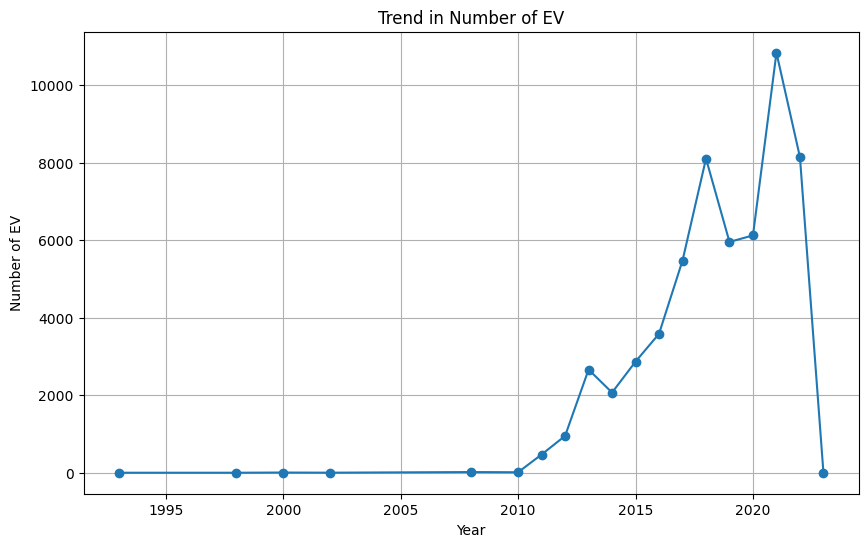

In [7]:
# Viewpoint #1 - Trend in Number of EV
ev_trend = data['Model Year'].value_counts().sort_index()

# Plotting the trend
plt.figure(figsize=(10, 6))
ev_trend.plot(kind='line', marker='o')
plt.title('Trend in Number of EV')
plt.xlabel('Year')
plt.ylabel('Number of EV')
plt.grid(True)
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'WA'),
  Text(1, 0, 'CA'),
  Text(2, 0, 'VA'),
  Text(3, 0, 'MD'),
  Text(4, 0, 'TX')])

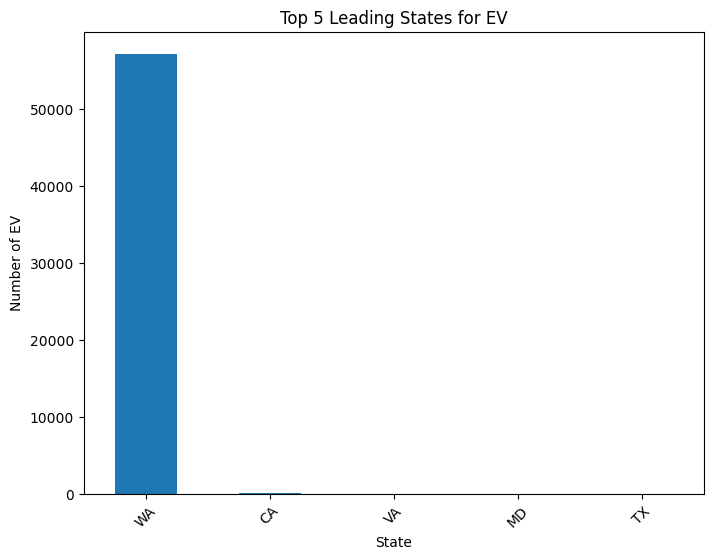

In [8]:
# Viewpoint #2 - Top 5 Leading States

top_states = data['State'].value_counts().head(5)

# Plotting the top 5 states
plt.figure(figsize=(8, 6))
top_states.plot(kind='bar')
plt.title('Top 5 Leading States for EV')
plt.xlabel('State')
plt.ylabel('Number of EV')
plt.xticks(rotation=45)

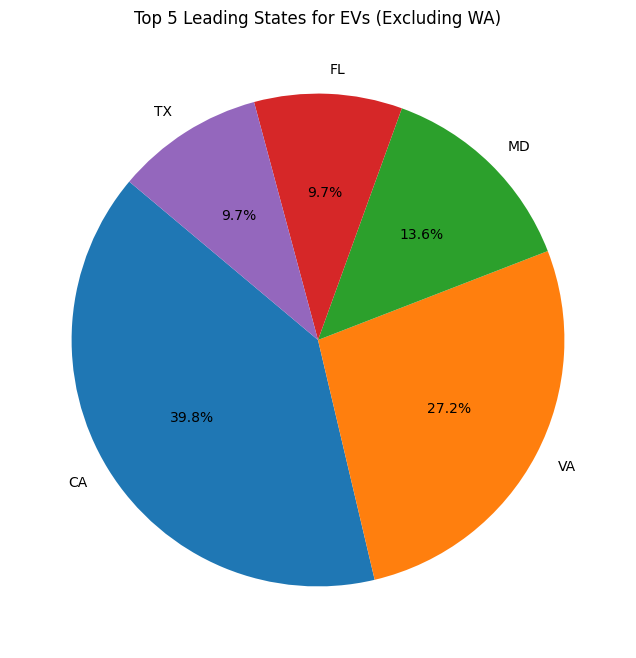

In [11]:
# Viewpoint 2 Alternative - Excluding WA
data_excluding_wa = data[data['State'] != 'WA']

# Get the top 5 states (excluding WA)
top_states_excluding_wa = data_excluding_wa['State'].value_counts().head(5)

# Plotting the top 5 states using a pie chart
plt.figure(figsize=(8, 8))
top_states_excluding_wa.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Leading States for EVs (Excluding WA)')
plt.ylabel('')
plt.show()

<Figure size 1200x800 with 0 Axes>

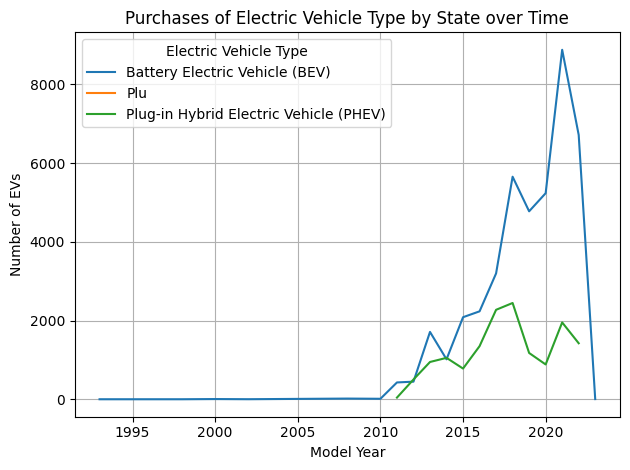

In [22]:
# Viewpoint #3 - Group by 'Model Year', 'State', and 'Electric Vehicle Type' and count the number of EVs
ev_type_by_state = data.groupby(['Model Year', 'Electric Vehicle Type'])['VIN (1-10)'].count().unstack()

# Plotting the purchases of 'Electric Vehicle Type' by 'State' over time
plt.figure(figsize=(12, 8))
ev_type_by_state.plot(kind='line')
plt.title('Purchases of Electric Vehicle Type by State over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs')
# plt.legend(title='Electric Vehicle Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

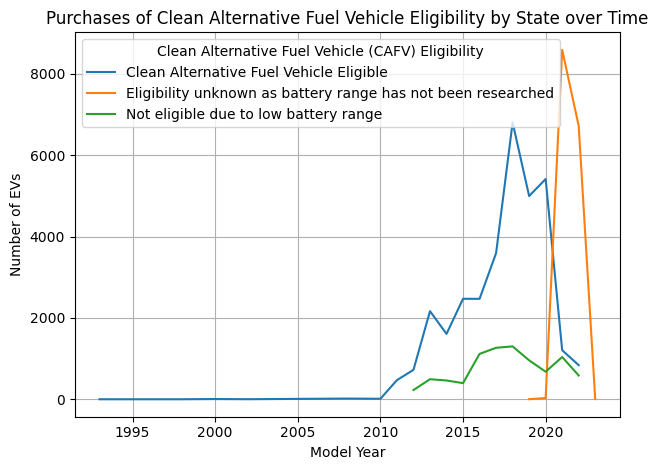

In [21]:
# Viewpoint #4 - CAFV Eligibility
# Group by 'Model Year', 'State', and 'Clean Alternative Fuel Vehicle Eligibility' and count the number of EVs
cafve_by_state = data.groupby(['Model Year', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'])['VIN (1-10)'].count().unstack()

# Plotting the purchases of 'Clean Alternative Fuel Vehicle Eligibility' by 'State' over time
plt.figure(figsize=(12, 8))
cafve_by_state.plot(kind='line')
plt.title('Purchases of Clean Alternative Fuel Vehicle Eligibility by State over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs')
# plt.legend(title='CAFV Eligibility', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

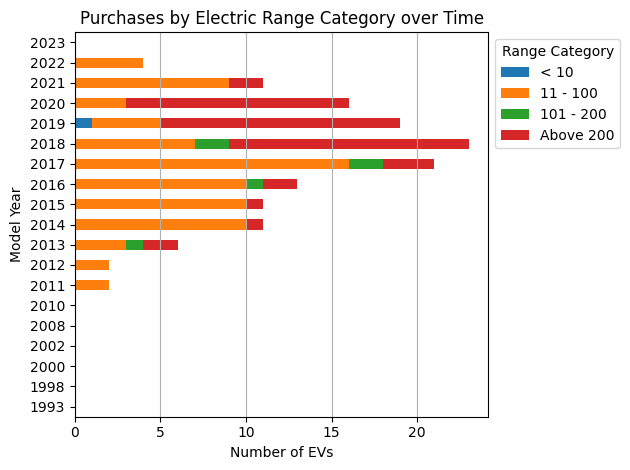

In [32]:
# Create bins for Electric Range
bins = [0, 10, 100, 200, float('inf')]
labels = ['< 10', '11 - 100', '101 - 200', 'Above 200']

# Add a new column 'Range Category' based on Electric Range bins
data['Range Category'] = pd.cut(data_excluding_wa['Electric Range'], bins=bins, labels=labels)

# Group by 'Model Year', 'Range Category', and count the number of EVs
range_by_category = data.groupby(['Model Year', 'Range Category'])['VIN (1-10)'].count().unstack()

# Plotting the purchases by Electric Range Category over time as a horizontal bar chart
plt.figure(figsize=(12, 8))
range_by_category.plot(kind='barh', stacked=True)
plt.title('Purchases by Electric Range Category over Time')
plt.xlabel('Number of EVs')
plt.ylabel('Model Year')
plt.legend(title='Range Category', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

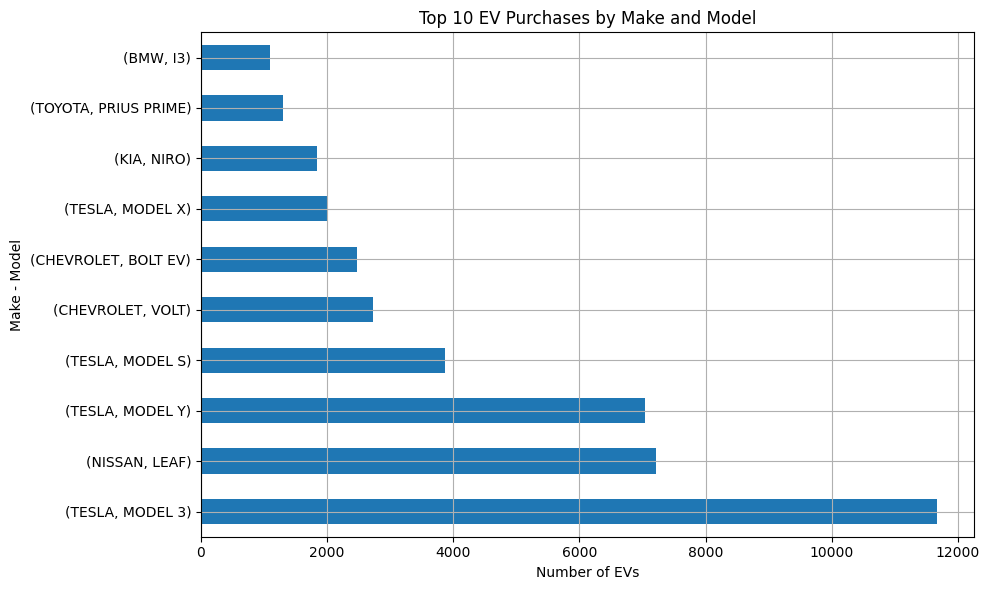

In [46]:
# Viewpoint - Marketshare by Top 10 Make + Model Pair
# Group by 'Make' and 'Model' and count the number of EVs
make_model_purchases = data.groupby(['Make', 'Model'])['VIN (1-10)'].count().sort_values(ascending=False).head(10)

# Plotting the purchases by 'Make' and 'Model'
plt.figure(figsize=(10, 6))
make_model_purchases.plot(kind='barh')
plt.title('Top 10 EV Purchases by Make and Model')
plt.xlabel('Number of EVs')
plt.ylabel('Make - Model')
plt.grid(True)
plt.tight_layout()
plt.show()

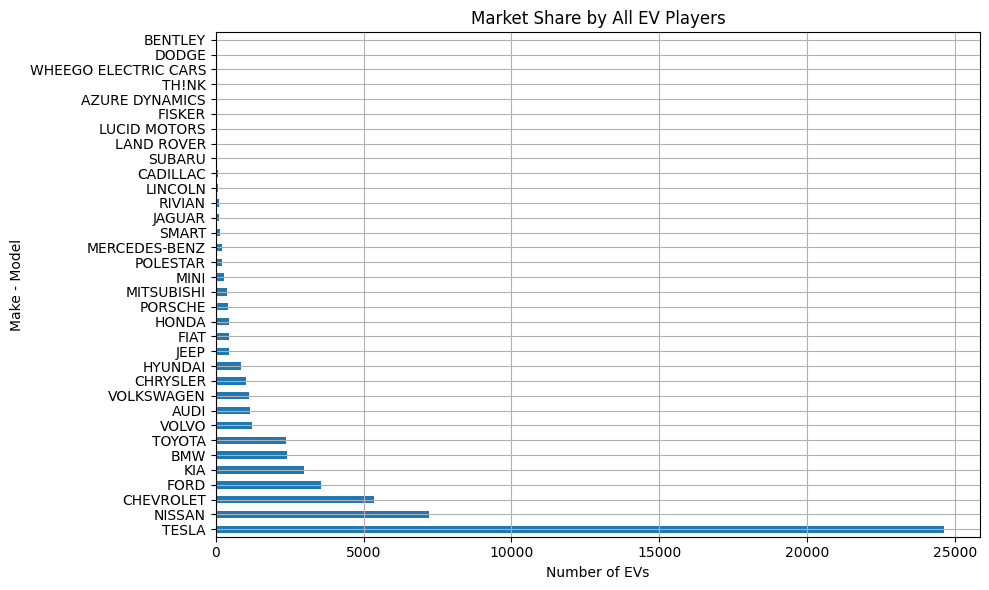

In [48]:
# Viewpoint - Market Share by All EV Players
# Group by 'Make' and 'Model' and count the number of EVs
make_model_purchases = data.groupby(['Make'])['VIN (1-10)'].count().sort_values(ascending=False)

# Plotting the purchases by 'Make' and 'Model'
plt.figure(figsize=(10, 6))
make_model_purchases.plot(kind='barh')
plt.title('Market Share by All EV Players')
plt.xlabel('Number of EVs')
plt.ylabel('Make - Model')
plt.grid(True)
plt.tight_layout()
plt.show()

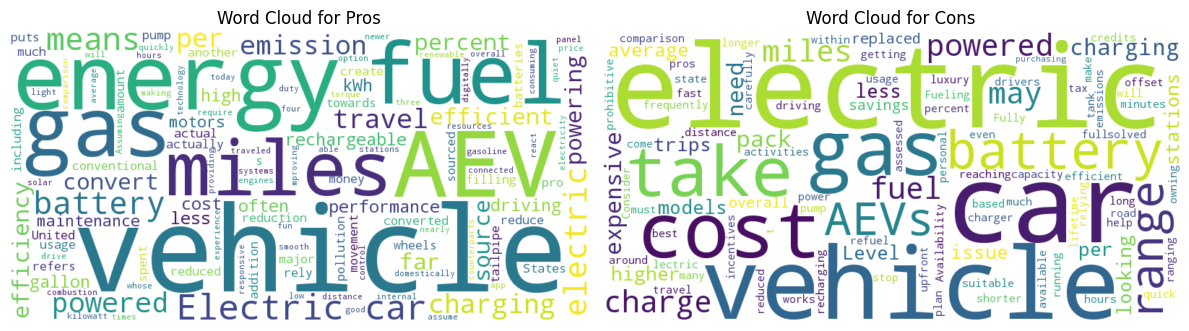

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

pros_text = '''
Electric cars are energy efficient
Energy efficiency refers to the amount of energy from the fuel source that is converted into actual energy for powering the wheels of a vehicle. AEVs are far more efficient than conventional gas-powered vehicles: AEV batteries convert 59 to 62 percent of energy into vehicle movement while gas powered vehicles only convert between 17 and 21 percent. This means that charging an AEV’s battery puts more towards actually powering the vehicle than filling up at a gas pump.

Electric cars reduce emissions
Emission reduction, including reduced usage of fuel, is another pro for all-electric vehicles. Because they rely on a rechargeable battery, driving an electric car does not create any tailpipe emissions which are a major source of pollution in the United States. In addition, the rechargeable battery means much less money spent on fuel, which means all energy can be sourced domestically (and often through renewable resources such as solar panel systems).

mproving battery technology in today's light-duty AEVs means they can drive 100 miles while consuming only 25 to 40 kilowatt-hours (kWh)  of electricity. Assuming that your electric car can travel three miles per kWh, the electric vehicle can travel about 43 miles for $1.00. By comparison, if we assume that gas costs $2.50 per gallon, an average gasoline vehicle with a fuel efficiency of 22 miles per gallon will only be able to travel 10 miles for the same price. The distance traveled for a fuel cost of $1.00 is nearly four times as far with an electric vehicle.

Electric cars are high performance and low maintenance
All-electric vehicles are also high performance vehicles whose motors are not only quiet and smooth but require less maintenance than internal combustion engines. The driving experience can also be fun because AEV motors react quickly, making them responsive with good torque. AEVs are overall newer than their gas powered counterparts and are often more digitally connected with charging stations providing the option to control charging from an app.
'''

cons_text = '''
Electric cars can travel less distance
AEVs on average have a shorter range than gas-powered cars. Most models ranging between 60 and 120 miles per charge and some luxury models reaching ranges of 300 miles per charge. For comparison, gas powered vehicles will average around 300 miles on a full tank of gas, and more fuel efficient vehicles getting much higher driving ranges. This may be an issue when looking at AEVs if you frequently take long trips. Availability of charging stations can make AEVs less suitable for activities like road trips.

Electric cars take longer to “refuel”
Fueling an all-electric car can also be an issue. Fully recharging the battery pack with a Level 1 or Level 2 charger can take up to 8 hours, and even fast charging stations take 30 minutes to charge to 80 percent capacity. Electric car drivers have to plan more carefully, because running out of power can’t be solved by a quick stop at the gas pump.

lectric cars are more expensive, and battery packs may need to be replaced
The battery packs within an electric car are expensive and may need to be replaced more than once over the lifetime of the car. All-electric vehicles are also more expensive than gas-powered cars, and the upfront cost of all-electric vehicle can also be prohibitive. However, the fuel cost savings, tax credits, and state incentives can help to offset this cost overall if they are available.

Overall, all-electric vehicles, like any vehicle, must be assessed based on personal needs and vehicle usage. There are many pros to owning an electric vehicle, such as fuel savings and reduced emissions, but this can come at the cost of relying on battery charging and higher costs. Consider what works best for you when looking into purchasing an all-electric vehicle.
'''

wordcloud_pros = WordCloud(width=800, height=400, background_color='white').generate(pros_text)

wordcloud_cons = WordCloud(width=800, height=400, background_color='white').generate(cons_text)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pros, interpolation='bilinear')
plt.title('Word Cloud for Pros')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_cons, interpolation='bilinear')
plt.title('Word Cloud for Cons')
plt.axis('off')

plt.tight_layout()
plt.show()
